## Movie Scraping  
## Pandeli Shyta 
### Class Wed 9:30-12:15, Date: 11/20
##### The goal for this project is to first scrape data off imdb and rinkworks using beautifulSoup.
##### Secondly, use the scraped data to create a clean .csv file using pandas. 
##### Lastly, to answer the following questions regarding the top 1000 movies according to imdb:
##### 1. What years had the most movies ranked in the top 1000 movies?
##### 2. What are the most common run times for the top 1000 movies?
##### 3. What are the top 10 highest grossing films in the top 1000 movies list?
##### 4. What are the 10 least grossing films in the top 1000 movies list?

## Importing Modules

In [637]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## First We need to scrape the imdb links off the top 1000 movies from the website rinkworks

### Connecting to server and checking its status

In [641]:
# The rinkworks url that contains the top 1000 ranked movies from imdb until the year 2015
url = "http://www.rinkworks.com/checklist/list.cgi?u=aquascape&U=taylordw&p=imdbtop1000"

# Connecting to the server. Using headers provided by chatgpt to bypass 403 error.
headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/117.0"}
response = requests.get(url, headers=headers)

# Checking status code
status = response.status_code
    
# an if statement for if the status code is 200 or there's an error
if status == 200:
    page = response.text
    soup = bs(page)
    
    #printing the html page using prettify
    print(soup.prettify())
    print(type(soup))

# Printing possible errors when trying to connect to server
else:
    print(f"Oops! Received status code {status}")

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   The Film-Lover's Check List: IMDB Top 1000
  </title>
  <link href="/css/style.css" rel="stylesheet" type="text/css"/>
  <link href="/css/checklist.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <center>
   <table cellpadding="3" cellspacing="0">
    <tr>
     <td align="center">
      <!-- Tribal Fusion: BEGIN AD CODE -->
      <center>
       <script type="text/javascript">
        <!--
e9 = new Object();
e9.size = "728x90,468x60";
//-->
       </script>
       <script src="http://tags.expo9.exponential.com/tags/RinkWorks/ROS/tags.js" type="text/javascript">
       </script>
      </center>
      <!-- Tribal Fusion: END AD CODE -->
     </td>
    </tr>
    <tr>
     <td align="center">
      <div style="width: 728px; height: 15px; border: 0px; margin: 0px; padding:

### Storing movie urls to a list

In [644]:
# Empty list that we will append the movie hyperlinks to which will then be used to navigate to imdb and scrape the desrired data
temporary_movie_links = []

# Searching for the part of the page that has the movies listed in
movie_data = soup.find(class_="title_listing")
# Printing movie_data to check that the desired data is found
print(movie_data)

<table class="title_listing"><tr><td>
<table>
<tr><td> </td></tr>
<tr><td class="bullet">1.</td>
<td><span class="seen"><a href="http://www.imdb.com/title/tt0111161/" target="_blank">The Shawshank Redemption</a> (1994)</span></td></tr>
<tr><td class="bullet">2.</td>
<td><span class="seen"><a href="http://www.imdb.com/title/tt0068646/" target="_blank">The Godfather</a> (1972)</span></td></tr>
<tr><td class="bullet">3.</td>
<td><span class="seen"><a href="http://www.imdb.com/title/tt0071562/" target="_blank">The Godfather, Part II</a> (1974)</span></td></tr>
<tr><td class="bullet">4.</td>
<td><span class="seen"><a href="http://www.imdb.com/title/tt0468569/" target="_blank">The Dark Knight</a> (2008)</span></td></tr>
<tr><td class="bullet">5.</td>
<td><span class="seen"><a href="http://www.imdb.com/title/tt0050083/" target="_blank">12 Angry Men</a> (1957)</span></td></tr>
<tr><td class="bullet">6.</td>
<td><span class="seen"><a href="http://www.imdb.com/title/tt0108052/" target="_blank">S

### Narrowing the search to located each hyperlink and then appending it to movie_links

In [647]:
# Searching the narrowed html file for every instance of 'tr' and then 'a'
for row in movie_data.find_all('tr'):
    movie_url = row.find('a')
    
    # If statement provided by chatgpt that finds the provided hyperlink in 'href' and appends it to the movie_links list from above
    if movie_url and 'href' in movie_url.attrs:
        temporary_movie_links.append(movie_url['href'])

# Printing the movie_links list to make sure that everything has worked accordingly
print(len(temporary_movie_links))
print(temporary_movie_links)

1001
['http://www.imdb.com/title/tt0111161/', 'http://www.imdb.com/title/tt0111161/', 'http://www.imdb.com/title/tt0068646/', 'http://www.imdb.com/title/tt0071562/', 'http://www.imdb.com/title/tt0468569/', 'http://www.imdb.com/title/tt0050083/', 'http://www.imdb.com/title/tt0108052/', 'http://www.imdb.com/title/tt0110912/', 'http://www.imdb.com/title/tt0060196/', 'http://www.imdb.com/title/tt0167260/', 'http://www.imdb.com/title/tt0137523/', 'http://www.imdb.com/title/tt2631186/', 'http://www.imdb.com/title/tt0120737/', 'http://www.imdb.com/title/tt1375666/', 'http://www.imdb.com/title/tt0080684/', 'http://www.imdb.com/title/tt0109830/', 'http://www.imdb.com/title/tt0109117/', 'http://www.imdb.com/title/tt0167261/', 'http://www.imdb.com/title/tt0073486/', 'http://www.imdb.com/title/tt0047478/', 'http://www.imdb.com/title/tt0099685/', 'http://www.imdb.com/title/tt0133093/', 'http://www.imdb.com/title/tt0076759/', 'http://www.imdb.com/title/tt0317248/', 'http://www.imdb.com/title/tt08166

### An error was found, some movie links are repeated. Rectifying this error.

In [650]:
# Creating an empty list that will contain nonrepeating movie links
movie_links = []

# Creating a for loop that will go through each list item and append it to movie_links if it's not in it
for hyperlink in temporary_movie_links:
    if hyperlink not in movie_links:
        movie_links.append(hyperlink)

# Printing the length of movie_links to check that the list is the correct size and printing the list itself for error checking
print(len(movie_links))
print(movie_links)

1000
['http://www.imdb.com/title/tt0111161/', 'http://www.imdb.com/title/tt0068646/', 'http://www.imdb.com/title/tt0071562/', 'http://www.imdb.com/title/tt0468569/', 'http://www.imdb.com/title/tt0050083/', 'http://www.imdb.com/title/tt0108052/', 'http://www.imdb.com/title/tt0110912/', 'http://www.imdb.com/title/tt0060196/', 'http://www.imdb.com/title/tt0167260/', 'http://www.imdb.com/title/tt0137523/', 'http://www.imdb.com/title/tt2631186/', 'http://www.imdb.com/title/tt0120737/', 'http://www.imdb.com/title/tt1375666/', 'http://www.imdb.com/title/tt0080684/', 'http://www.imdb.com/title/tt0109830/', 'http://www.imdb.com/title/tt0109117/', 'http://www.imdb.com/title/tt0167261/', 'http://www.imdb.com/title/tt0073486/', 'http://www.imdb.com/title/tt0047478/', 'http://www.imdb.com/title/tt0099685/', 'http://www.imdb.com/title/tt0133093/', 'http://www.imdb.com/title/tt0076759/', 'http://www.imdb.com/title/tt0317248/', 'http://www.imdb.com/title/tt0816692/', 'http://www.imdb.com/title/tt01143

## Scraping the movie data from IMDB

### Creating Empty lists that we will store the desired movie data and then create columns with

In [654]:
movie_name_list = []
release_year_list = []
run_time_list = []
worldwide_boxoffice = []

### Using Shawshank Redemption as an example. The code will then be made into a function that can be used to cycle 
### through the 'movie_links' list

### Connecting to the server. 

In [658]:
# Using headers provided by chatgpt to bypass 403 error when using link to connect with server
headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/117.0"}
response = requests.get("https://www.imdb.com/title/tt0111161/", headers=headers)

# connecting to the server to scrape data from
page = response.text
soup = bs(page)

# Printing the page using prettify
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <script>
   if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }
  </script>
  <script>
   window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1732250709074);
        }
    })
  </script>
  <title>
   The Shawshank Redemption (1994) - IMDb
  </title>
  <meta content="The Shawshank Redemption: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. A banker convicted of uxoricide forms a friend

### Finding the title of the movie

In [661]:
# Using .find method to find the class 'hero__primary-text'
title_data = soup.find(class_="hero__primary-text")
title = title_data.text

# Printing the title to be sure the code is working
print(title)

The Shawshank Redemption


### Finding the year that the movie was released

In [664]:
# Locate the section with the "Details" data-testid
details_section = soup.find('section', {'data-testid': 'Details'})

if details_section:
    # Find the <li> element with the title 'release date'
    release_date_item = details_section.find('li', {'data-testid': 'title-details-releasedate'})

    if release_date_item:
        # Extract the text from the <div> containing the release date
        release_date_div = release_date_item.find('div')

        if release_date_div:
            release_date = release_date_div.find('a').text

            # Printing 'release_date' to be sure it's properly scrapped
            print(release_date)

            # Extracting just the year from the date using string spliting and striping
            # Creating an if statement to fix errors
            if ',' in release_date:
                year_country = release_date.split(',')[1].strip()
                year = year_country.split(' ')[0].strip()
                print(year)
            else:
                year = release_date.split(' ')[1].strip()
                print(year)

October 14, 1994 (United States)
1994


### Finding the runtime of the movie

In [667]:
# Locate the section with "TechSpecs"
runtime_section = soup.find('section', {'data-testid': 'TechSpecs'})

if runtime_section:
    # Find the <li> element with the title 'title-techspec_runtime'
    runtime_item = runtime_section.find('li', {'data-testid': 'title-techspec_runtime'})

    if runtime_item:
        # Extract the text from the <div> containing the runtime
        runtime_div = runtime_item.find(class_= 'ipc-metadata-list-item__content-container').text

        # Printing 'runtime_div' to make sure that the desired data was extracted
        print(runtime_div)

# Creating a list using the split method to removing hours and minutes from the string
runtime_item_list = runtime_div.split(' ')

# Printing the list for error checking
print(runtime_item_list)

# Creating a for loop to check items in the runtime list
for item in runtime_item_list:
    
    # creating a list with keywords
    keywords_list = ['hours', 'hour', 'minutes']
    
    # Since some movies are exactily 2 hours long or less than an hour we need create a special case for this.
    if len(runtime_item_list) == 2: 
        if 'hours' in runtime_item_list:
            runtime = 120
            print(runtime)
        else:
            runtime = runtime_item_list[0]
            print(runtime)
    
    
    # Continuation for most runtimes
    # Removing 'hours', 'hour', and 'minutes' from the 'runtime_item_list'
    else:
        if item in keywords_list:
            # Removes the keywords so only integers remain
            runtime_item_list.remove(item)
            
            # Converts the items to integers then, multiplies the hours by 60 and adds the minutes for a final runtime
            runtime = (int(runtime_item_list[0]) * 60) + int(runtime_item_list[1])
            # Prints runtime to check for errors
print(runtime)

2 hours 22 minutes
['2', 'hours', '22', 'minutes']
142


### Finding the Worldwide BoxOffice Revenue

In [670]:
# Finding the section 'BoxOffice'
box_office_section = soup.find('section', {'data-testid': 'BoxOffice'})


# Creating an if statement in case the data doesn't exist it assigns 'Data not available' to worldwide_box_office_revenue
if box_office_section is None:
    worldwide_box_office_revenue = "Data not available"
    print(worldwide_box_office_revenue)

# Finding the <li> section 'title-boxoffice-cumulativeworldwidegross'
box_office_li = box_office_section.find('li', {'data-testid': 'title-boxoffice-cumulativeworldwidegross'})

# Creating an if statement in case the data doesn't exist it assigns 'Data not available' to worldwide_box_office_revenue
if box_office_li is None:
    worldwide_box_office_revenue = "Data not available"
    
# Finding the <li> section 'ipc-metadata-list-item__list-content-item'
else:
    box_office_revenue =  box_office_li.find(class_='ipc-metadata-list-item__list-content-item').text

    # Printing the 'box_office_revenue' to check if the data was scrapped correctly
    print(box_office_revenue)
        
    # Converting 'box_office_revenue' into an integer using the replace and int method
    updated_revenue = box_office_revenue.replace('$', '').replace(',','')
    worldwide_box_office_revenue = int(updated_revenue)

    # Printing the 'worldwide_box_office_revenue' as a final check
    print(worldwide_box_office_revenue)

$29,332,133
29332133


### Creating a function "scrape_data" that will do everything from above using the links from the list 'movie_links'

In [673]:
# Creating, naming, and specifying the input parameters of the function
def scrape_data(movie_url):
    # Reusing above code 
    # Connecting to the server. Using headers provided by chatgpt to bypass 403 error.
    print(movie_url)
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/117.0"}
    response = requests.get(movie_url, headers=headers)
    
    # connecting to the server to scrape data from
    page = response.text
    soup = bs(page)
    
    # Finding the title of the movie
    title_data = soup.find(class_="hero__primary-text")
    title = title_data.text
    print(title)
    
    # Locate the section with the "Details" data-testid
    details_section = soup.find('section', {'data-testid': 'Details'})
    
    if details_section:
        # Find the <li> element with the title 'release date'
        release_date_item = details_section.find('li', {'data-testid': 'title-details-releasedate'})
    
        if release_date_item:
            # Extract the text from the <div> containing the release date
            release_date_div = release_date_item.find('div')
            
            if release_date_div:
                release_date = release_date_div.find('a').text
                
                # Extracting just the year from the date using string spliting and striping
                # Creating an if statement to fix errors
                if ',' in release_date:
                    year_country = release_date.split(',')[1].strip()
                    year = year_country.split(' ')[0].strip()
                    print(year)
                else:
                    year = release_date.split(' ')[1].strip()
                    print(year)
    
    # Locate the section with "TechSpecs"
    runtime_section = soup.find('section', {'data-testid': 'TechSpecs'})
    
    if runtime_section:
        # Find the <li> element with the title 'title-techspec_runtime'
        runtime_item = runtime_section.find('li', {'data-testid': 'title-techspec_runtime'})
    
        if runtime_item:
            # Extract the text from the <div> containing the runtime
            runtime_div = runtime_item.find(class_= 'ipc-metadata-list-item__content-container').text
            
    # Cleaning the runtime information from '##hours, ##minutes' to just minutes
    # First splitting the data by spaces
    runtime_item_list = runtime_div.split(' ')

    # Creating a for loop to check items in the runtime list
    for item in runtime_item_list:
        
        # creating a list with keywords
        keywords_list = ['hours', 'hour', 'minutes']
        
        # Since some movies are exactily 2 hours long or less than an hour we need create a special case for this.
        if len(runtime_item_list) == 2: 
            if 'hours' in runtime_item_list:
                runtime = 120
            else:
                runtime = runtime_item_list[0]   
        
        # Continuation for most runtimes
        # Removing 'hours', 'hour', and 'minutes' from the 'runtime_item_list'
        else:
            if item in keywords_list:
                # Removes the keywords so only integers remain
                runtime_item_list.remove(item)
                
                # Converts the items to integers then, multiplies the hours by 60 and adds the minutes for a final runtime
                runtime = (int(runtime_item_list[0]) * 60) + int(runtime_item_list[1])
                # Prints runtime to check for errors
    print(runtime)
    
    # Finding the Gross Worldwide BoxOffice
    box_office_section = soup.find('section', {'data-testid': 'BoxOffice'})

    # Creating an if statement in case the data doesn't exist it 'Data not available' to worldwide_box_office_revenue
    if box_office_section is None:
        worldwide_box_office_revenue = "Data not available"
        print(worldwide_box_office_revenue)
    
    else:
        box_office_li = box_office_section.find('li', {'data-testid': 'title-boxoffice-cumulativeworldwidegross'})

        # Creating an if statement in case the data doesn't exist it assigns 'Data not available' to worldwide_box_office_revenue
        if box_office_li is None:
            worldwide_box_office_revenue = "Data not available"
        
        else:
            box_office_revenue =  box_office_li.find(class_='ipc-metadata-list-item__list-content-item').text
            print(box_office_revenue)
                                        
            # Converting 'box_office_revenue' into an integer
            updated_revenue = box_office_revenue.replace('$', '').replace(',','')
            worldwide_box_office_revenue = int(updated_revenue)

    print("\n")
  
    # Appending the items: 'title', 'year', 'runtime', and ''worldwide_box_office_revenue' to the lists.
    # Using an if statement to prevent adding the same movie data multiple times.
    if title not in movie_name_list:
        movie_name_list.append(title)
        release_year_list.append(year)
        run_time_list.append(runtime)
        worldwide_boxoffice.append(worldwide_box_office_revenue)

### Running the 'scrape_data' function to fill the lists with the desired data. **WARNING** takes 15min to compile.

In [679]:
# Creating a for loop that runs each link from the movie_links list through the function 'scrape_data'.
# Using an if statement to prevent running function without empty column lists.
if len(movie_name_list) == 0:
    for link in movie_links:
        scrape_data(link)

### Prints each list to check for errors

In [682]:
# Printing length of 'movie_name_list'
print(f"Movie name list length: {len(movie_name_list)}\n")

# Printing length of 'release_year_list'
print(f"Release year list length: {len(release_year_list)}\n")

# Printing length of 'run_time_list'
print(f"Runtime list length: {len(run_time_list)}\n")

# Printing length of 'worldwide_boxoffice'
print(f"Worldwide Boxoffice list length: {len(worldwide_boxoffice)}\n")

# Movie list had 4 repeated movies

Movie name list length: 996

Release year list length: 996

Runtime list length: 996

Worldwide Boxoffice list length: 996



## Creating a Panda's dataframe

In [685]:
# Creating a panda's dataframe with the required columns
movies_df = pd.DataFrame({
    "Title": movie_name_list, 
    "Release Year": release_year_list, 
    "Runtime": run_time_list, 
    "Gross Worldwide Boxoffice": worldwide_boxoffice
})

# Printing movies_df to check
print(movies_df)

# Saving it as a .csv file to begine data cleaning
movies_df.to_csv('Top 1000 Moves.csv', index = True)

                        Title Release Year  Runtime Gross Worldwide Boxoffice
0    The Shawshank Redemption         1994      142                  29332133
1               The Godfather         1972      175                 250342198
2       The Godfather Part II         1974      202                  47962277
3             The Dark Knight         2008      152                1009053678
4                12 Angry Men         1957       96                      2945
..                        ...          ...      ...                       ...
991           The Bucket List         2008       97                 175372502
992                  Vacation         1983       98                  61418362
993           Raising Arizona         1987       94                  29180280
994                     X-Men         2000      104                 296339528
995             Sleepy Hollow         1999      105                 206071526

[996 rows x 4 columns]


## Exploring the questions 

### 1. What years had the most movies ranked in the top 1000 movies? 

In [689]:
# Creating an empty dictionary that will store the year as a key and how many movies are in the top 1000 as a value
years_dict = {}

# Creating a for loop that checks each year and adds it to 'years_dict' if the key does not exist or adds 1 to the value if it does
for year in release_year_list:
    if year in years_dict.keys():
        years_dict[year] += 1
    if year not in years_dict.keys():
        years_dict[year] = 1

# Printing to check if everything is correct
print(f" Years dictionary: \n{years_dict}\n")

# Sorting the years_dict by its values in descending order. Used ChatGPT for help as I was getting stuck.
sorted_by_frequency_dict = dict(sorted(years_dict.items(), key=lambda x: x[1], reverse=True))
# Printing updated 'sorted_years_dict' to check for errors
print(f" Sorted years dictionary: \n{sorted_by_frequency_dict}\n")

# Using slicing to create a new dictionary with only the first 10 key:value pairs. Used ChatGPT
shortened_years_dict = dict(list(sorted_by_frequency_dict.items())[:10])
# Printing updated 'shortened_years_dict' to check for errors
print(f" Top 10 movie years: \n{shortened_years_dict}")

 Years dictionary: 
{'1994': 21, '1972': 8, '1974': 9, '2008': 29, '1957': 3, '1967': 14, '2003': 30, '1999': 22, '2015': 19, '2001': 30, '2010': 30, '1980': 9, '2002': 19, '1975': 8, '1956': 8, '1990': 17, '1977': 5, '2004': 41, '2014': 34, '1995': 14, '1947': 3, '1997': 20, '1991': 11, '1969': 5, '1931': 4, '2011': 26, '1943': 2, '1998': 21, '1936': 1, '1981': 3, '1960': 4, '1954': 4, '2000': 20, '1950': 4, '2006': 27, '1964': 5, '2012': 27, '1985': 10, '1979': 9, '1941': 5, '2007': 47, '1989': 15, '2009': 31, '1958': 6, '1982': 11, '1986': 10, '1984': 10, '1959': 7, '1944': 3, '1983': 10, '2013': 31, '1963': 6, '1949': 1, '1992': 15, '1921': 1, '1976': 8, '1952': 4, '1973': 10, '1961': 9, '1951': 5, '1948': 3, '1987': 14, '1968': 8, '1927': 2, '2005': 29, '1939': 3, '1925': 2, '1988': 12, '1955': 6, '1940': 5, '1934': 1, '1996': 16, '1962': 6, '1971': 7, '1966': 1, '1920': 1, '1953': 4, '1946': 2, '1993': 24, '1930': 1, '1933': 2, '1938': 4, '1970': 4, '(United': 1, '1922': 1, '1965

### Organizing data for plotting with seaborn

In [692]:
# Setting up lists to make them compatible for plotting using seaborn
top_years = []
top_frequency = []

# Appending the keys and values to the lists
for key in shortened_years_dict.keys():
    top_years.append(key)
for value in shortened_years_dict.values():
    top_frequency.append(value)

# Creating a new dictionary with two keys: 'years' and 'frequency'
final_top_dict = {"Years": top_years, "Frequency": top_frequency}
print(final_top_dict)

{'Years': ['2007', '2004', '2014', '2009', '2013', '2003', '2001', '2010', '2008', '2005'], 'Frequency': [47, 41, 34, 31, 31, 30, 30, 30, 29, 29]}


### Graphing the data using Seaborn

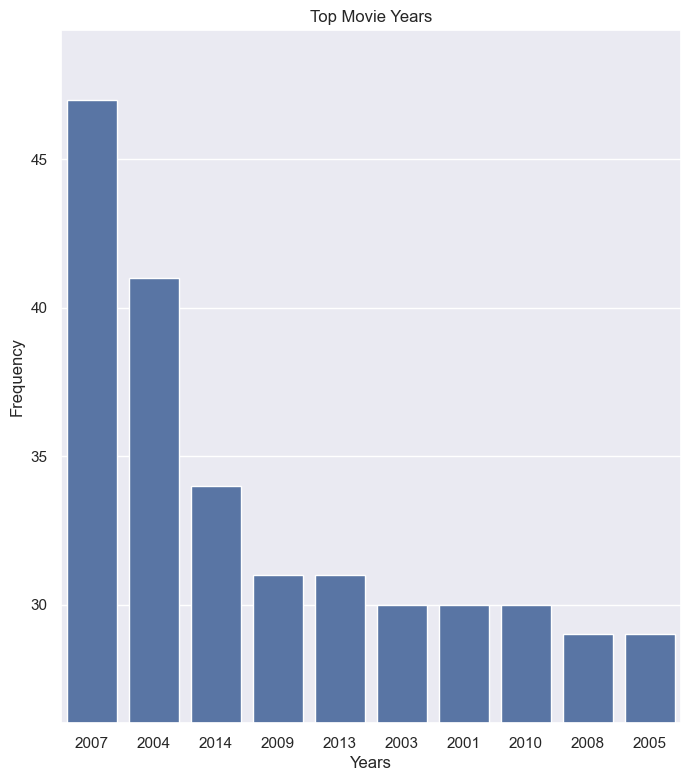

In [695]:
import seaborn as sns

sns.set_theme(style="darkgrid")

# Adjusting size of the figure
plt.figure(figsize= (8, 9))

# Plot the responses for different events and regions
sns.barplot(x="Years", y="Frequency",
             data=final_top_dict)

# Adding a title
plt.title("Top Movie Years")

# Adjusting the y-axis to start at 26 instead
plt.ylim(26, None)

# Showing the graph
plt.show()

### 2. What are the most common run times for the top 1000 movies?

In [698]:
# Creating an empty dictionary that will store the runtime as a key and how many movies are in the top 1000 as a value
runtime_dict = {}

# Creating a for loop that checks each year and adds it to 'years_dict' if the key does not exist or adds 1 to the value if it does
for time in run_time_list:
    if time in runtime_dict.keys():
        runtime_dict[time] += 1
    if time not in runtime_dict.keys():
        runtime_dict[time] = 1

# Printing to check if everything is correct
print(f" Runtime dictionary: \n{runtime_dict}\n")

# Sorting the runtime_dict by its values in descending order. Used ChatGPT for help as I was getting stuck.
sorted_runtime_dict = dict(sorted(runtime_dict.items(), key=lambda x: x[1], reverse=True))
# Printing updated 'sorted_years_dict' to check for errors
print(f" Sorted runtime dictionary: \n{sorted_runtime_dict}\n")

# Using slicing to create a new dictionary with only the first 10 key:value pairs. Used ChatGPT
shortened_runtime_dict = dict(list(sorted_runtime_dict.items())[:10])
# Printing updated 'shortened_runtime_dict' to check for errors
print(f" Top 10 movie runtimes: \n{shortened_runtime_dict}")

 Runtime dictionary: 
{142: 3, 175: 1, 202: 2, 152: 4, 96: 15, 195: 1, 154: 5, 178: 6, 201: 1, 139: 6, 159: 3, 148: 3, 124: 20, 160: 5, 179: 2, 133: 9, 207: 1, 145: 4, 136: 7, 121: 19, 130: 19, 169: 4, 127: 18, 106: 14, 116: 16, 118: 16, 110: 19, 166: 2, 87: 6, 112: 20, 102: 20, 119: 16, 115: 16, 109: 14, 189: 3, 150: 4, 137: 9, 155: 4, 151: 3, 113: 22, 95: 12, 164: 3, 147: 6, 174: 2, 125: 13, 88: 11, 117: 14, 165: 3, 170: 7, 146: 8, 98: 16, 99: 15, 149: 3, 122: 18, 120: 21, 229: 1, 123: 12, 128: 14, 107: 16, 131: 12, 321: 1, 227: 1, 129: 21, 153: 9, 103: 13, 89: 6, 68: 1, 134: 11, 108: 16, 186: 2, 114: 13, 138: 14, 144: 11, 126: 16, 91: 5, 143: 9, 132: 9, 93: 13, 81: 4, 140: 8, 181: 3, 156: 3, 172: 4, 78: 3, 92: 14, 86: 5, 161: 3, 163: 2, 105: 17, 238: 1, 224: 1, 135: 9, 183: 1, 100: 18, 83: 6, 162: 4, 94: 14, 167: 3, 188: 3, 111: 14, 158: 5, 101: 17, 212: 1, 191: 2, 185: 2, 67: 1, 85: 7, 104: 16, 141: 9, 84: 4, 80: 6, 76: 2, 69: 2, 82: 3, 90: 9, 197: 2, 66: 1, 70: 1, 97: 9, 64: 1, 75

### Organizing data for plotting with seaborn

In [701]:
# Setting up lists to make them compatible for plotting using seaborn
top_runtimes = []
top_runtimes_frequency = []

# Appending the keys and values to the lists
for key in shortened_runtime_dict.keys():
    top_runtimes.append(key)
for value in shortened_runtime_dict.values():
    top_runtimes_frequency.append(value)

# Creating a new dictionary with two keys: 'Runtime' and 'frequency'
final_top_runtimes_dict = {"Runtime": top_runtimes, "Frequency": top_runtimes_frequency}
print(final_top_runtimes_dict)

{'Runtime': [113, 120, 129, 124, 112, 102, 121, 130, 110, 127], 'Frequency': [22, 21, 21, 20, 20, 20, 19, 19, 19, 18]}


### Graphing the Data using Seaborn

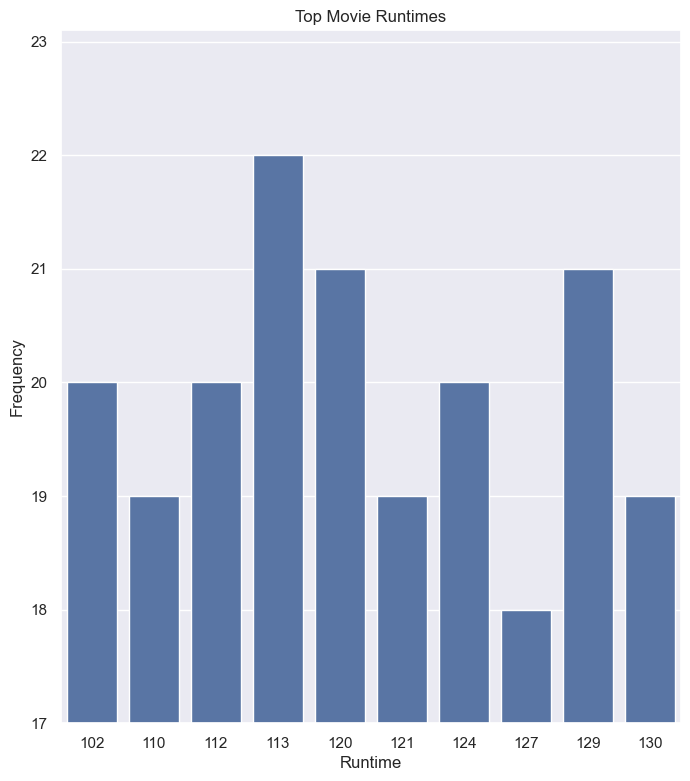

In [704]:
sns.set_theme(style="darkgrid")

# Adjusting size of the figure
plt.figure(figsize= (8, 9))

# Plot the responses for different events and regions
sns.barplot(x="Runtime", y="Frequency",
             data=final_top_runtimes_dict)

# Adding a title
plt.title("Top Movie Runtimes")

# Adjusting the y-axis to start at 17 instead
plt.ylim(17, None)

# Showing the graph
plt.show()

### 3. What are the top 10 highest grossing films in the top 1000 movies list?

In [707]:
# Creating a new list which removes non integer values as some movies were missing this data
cleaned_worldwide_boxoffice = []

# Creating a for loop that appends all items that are an integer to cleaned_worldwide_boxoffice
for item in worldwide_boxoffice:
    if type(item) == int:
        cleaned_worldwide_boxoffice.append(item) 
# Printing cleaned_worldwide_boxoffice to check for errors
print(f"{cleaned_worldwide_boxoffice}\n")

# creating a new sorted list of 'cleaned_worldwide_boxoffice'
sorted_worldwide_boxoffice = sorted(cleaned_worldwide_boxoffice, reverse=True)
# Printing the sorted list to make sure it has executed correctly
print(f"{sorted_worldwide_boxoffice}\n")

# creating an empty list to house the first 10 list items from 'sorted_worldwide_boxoffice'  
top_10_boxoffice = []

# Creating a for loop that appends the first 10 items from 'sorted_worldwide_boxoffice' into 'top_10_boxoffice'
for money in sorted_worldwide_boxoffice[:10]:
    top_10_boxoffice.append(money)

# Printing for error checking
print(top_10_boxoffice)     

[29332133, 250342198, 47962277, 1009053678, 2945, 322161245, 213928762, 25264999, 1137996691, 101321009, 24548038, 888120042, 839030630, 550016086, 678226465, 938210343, 109115366, 1060273, 47054352, 467840449, 775398507, 30680793, 732055745, 327333559, 9767242, 23341568, 230099013, 272742922, 20278356, 5435312, 55154, 358110581, 426590315, 4720495, 482351251, 23875714, 463618, 389925971, 32066765, 37043820, 50360880, 286801374, 120098945, 517778573, 465516248, 308663, 291481358, 40047236, 9631984, 1114975066, 384577472, 105090566, 13020497, 109676311, 972212, 981708285, 77672685, 859076254, 8290, 108628991, 801143, 426076293, 60262836, 502391, 47959450, 7903, 527403656, 170338626, 35566, 11488778, 356296601, 1707502, 131060248, 17592355, 5475540, 192323, 175183052, 22926076, 7808900, 19543, 482466382, 213216216, 7390108, 4384642, 45763719, 599934, 21505244, 1067316101, 27034174, 451336, 2931191, 41979, 434862, 1404307, 73395181, 17551296, 28579636, 2092468, 154501, 156000000, 52075942

### Finding the titles of the movies

In [710]:
# Creating an empty list that will store the names of the top 10 movies
top_10_movies = []

# Creating a for loop that uses the index number to search through the movie_name_list
for item in top_10_boxoffice:
    movie_index = worldwide_boxoffice.index(item)
    top_10_movies.append(movie_name_list[movie_index])

# Printing the list of movies to check if the movies are correct
print(top_10_movies)

['Avatar', 'Titanic', 'The Avengers', 'Avengers: Age of Ultron', 'Harry Potter and the Deathly Hallows: Part 2', 'Frozen', 'The Lord of the Rings: The Return of the King', 'The Dark Knight Rises', 'Skyfall', 'Jurassic Park']


### Organizing data for plotting with seaborn

In [713]:
# Creating a new list that will store the boxoffice earnings in millions
in_millions = []

# Slicing each item in top_10_boxoffice to 3 digits so the list contains the values in millions
for revenue in top_10_boxoffice:
    revenue_in_millions = int(str(revenue)[:3])
    in_millions.append(revenue_in_millions)    

# Creating a new dictionary with two keys: 'Title' and 'Gross Boxoffice Revenue'
final_top_boxoffice_dict = {"Title": top_10_movies, "Boxoffice Revenue": in_millions}
# Printing to check for errors
print(final_top_boxoffice_dict)

{'Title': ['Avatar', 'Titanic', 'The Avengers', 'Avengers: Age of Ultron', 'Harry Potter and the Deathly Hallows: Part 2', 'Frozen', 'The Lord of the Rings: The Return of the King', 'The Dark Knight Rises', 'Skyfall', 'Jurassic Park'], 'Boxoffice Revenue': [292, 226, 152, 140, 134, 130, 113, 111, 110, 110]}


### Graphing the Data using Seaborn. Used ChatGPT for help as unfamiliar with this module

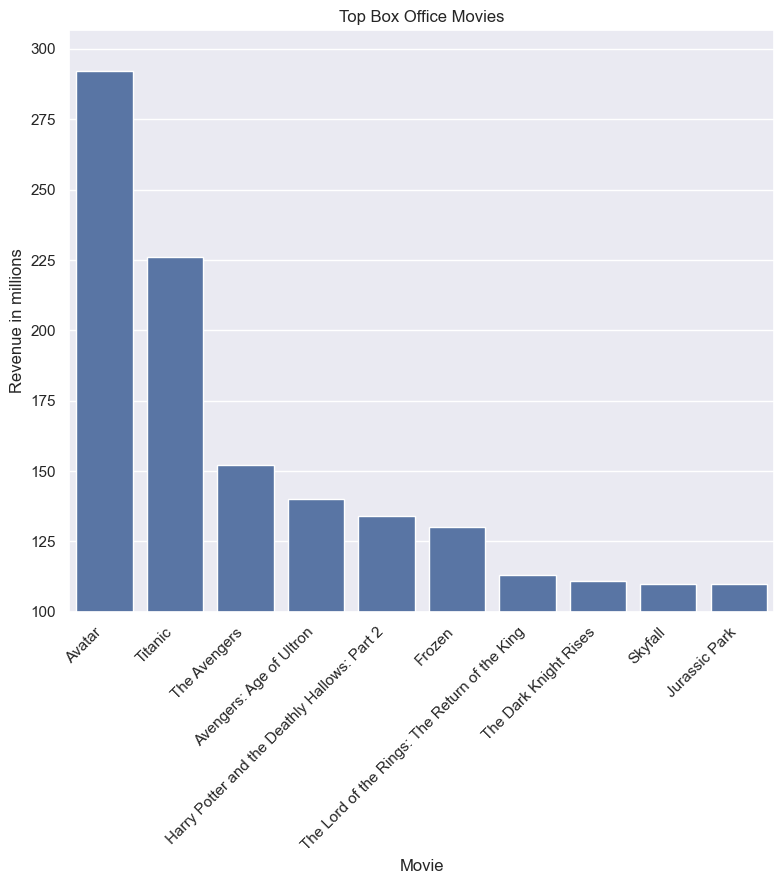

In [716]:
sns.set_theme(style="darkgrid")

# Adjusting size of the figure
plt.figure(figsize= (8, 9))

# Plot the responses for different events and regions
boxoffice_plot = sns.barplot(x="Title", y="Boxoffice Revenue",
             data=final_top_boxoffice_dict)

plt.xticks(rotation = 45, ha="right")

# Naming the plot
plt.title("Top Box Office Movies")

# Adjusting the y-label
plt.ylabel("Revenue in millions")

# Adjusting the x-label
plt.xlabel("Movie")

# Adjusting the y-axis to start at 100 instead
plt.ylim(100, None)

# Adjusting Layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show()

### 4. What are the 10 least grossing films in the top 1000 movies list?

In [719]:
# creating a new reversed sorted list of 'cleaned_worldwide_boxoffice'
reverse_sorted_worldwide_boxoffice = sorted(cleaned_worldwide_boxoffice, reverse=False)
# Printing the sorted list to make sure it has executed correctly
print(f"{reverse_sorted_worldwide_boxoffice}\n")

# creating an empty list to house the first 10 list items from 'reverse_sorted_worldwide_boxoffice'  
bottom_10_boxoffice = []

# Creating a for loop that appends the first 10 items from 'reverse_sorted_worldwide_boxoffice' into 'bottom_10_boxoffice'
for money in reverse_sorted_worldwide_boxoffice[:10]:
    bottom_10_boxoffice.append(money)

# Printing for error checking
print(bottom_10_boxoffice)    

[151, 194, 217, 291, 380, 416, 612, 651, 651, 785, 865, 875, 972, 1071, 1073, 1098, 1475, 1626, 1742, 1767, 1872, 2356, 2945, 3288, 3350, 3717, 3978, 4072, 4154, 4550, 4940, 6030, 7117, 7304, 7411, 7903, 8290, 9297, 10190, 10471, 10786, 10883, 11533, 11665, 12180, 12498, 12678, 14227, 16993, 19000, 19543, 20616, 21412, 22728, 27210, 27669, 28344, 30471, 31490, 33174, 35566, 36416, 37732, 38575, 39032, 41362, 41493, 41979, 45313, 45595, 46305, 47000, 50415, 51050, 52623, 53162, 54396, 54531, 55154, 59547, 61389, 61676, 64919, 77612, 81070, 83096, 87019, 90813, 103230, 106318, 109622, 113328, 115762, 117060, 126052, 133898, 146123, 154501, 159822, 175119, 182134, 192323, 193228, 197754, 200502, 205569, 208457, 217420, 217945, 219331, 229210, 230637, 237994, 241688, 242623, 279084, 308663, 311212, 328741, 365429, 370787, 375524, 377967, 413654, 434862, 438245, 451336, 459234, 463618, 487117, 502391, 511852, 528245, 528514, 594039, 594615, 599934, 640561, 647074, 669890, 754907, 801143, 87

### Finding the titles of the movies

In [722]:
# Creating an empty list that will store the names of the bottom 10 movies
bottom_10_movies = []

# Creating a for loop that uses the index number to search through the movie_name_list
for item in bottom_10_boxoffice:
    movie_index = worldwide_boxoffice.index(item)
    bottom_10_movies.append(movie_name_list[movie_index])

# Printing the list of movies to check if the movies are correct
print(bottom_10_movies)

['Laura', 'Anatomy of a Murder', 'High Noon', 'The Adventures of Robin Hood', 'The Killing', 'The Magnificent Seven', 'The General', 'King Kong', 'King Kong', 'Hard Boiled']


### Organizing data for plotting with seaborn

In [725]:
# Creating a new dictionary with two keys: 'Title' and 'Boxoffice Revenue'
final_bottom_boxoffice_dict = {"Title": bottom_10_movies, "Boxoffice Revenue": bottom_10_boxoffice}
# Printing to check for errors
print(final_bottom_boxoffice_dict)

{'Title': ['Laura', 'Anatomy of a Murder', 'High Noon', 'The Adventures of Robin Hood', 'The Killing', 'The Magnificent Seven', 'The General', 'King Kong', 'King Kong', 'Hard Boiled'], 'Boxoffice Revenue': [151, 194, 217, 291, 380, 416, 612, 651, 651, 785]}


### Graphing the Data using Seaborn. Used ChatGPT for help as unfamiliar with this module

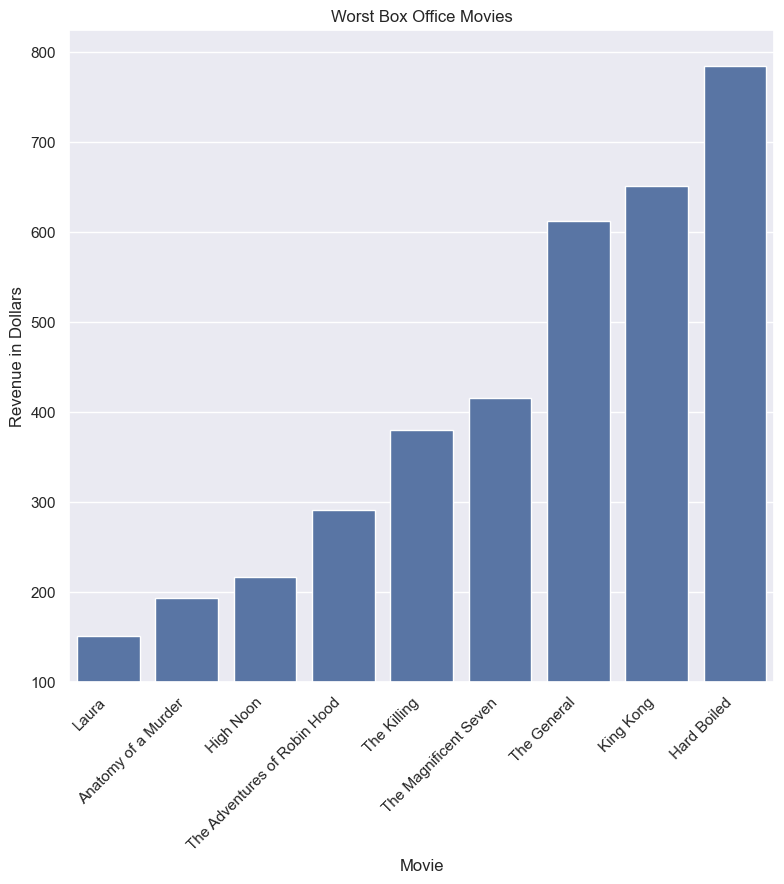

In [728]:
sns.set_theme(style="darkgrid")

# Adjusting size of the figure
plt.figure(figsize= (8, 9))

# Plot the responses for different events and regions
boxoffice_plot = sns.barplot(x="Title", y="Boxoffice Revenue",
             data=final_bottom_boxoffice_dict)

plt.xticks(rotation = 45, ha="right")

# Naming the plot
plt.title("Worst Box Office Movies")

# Adjusting the y-label
plt.ylabel("Revenue in Dollars")

# Adjusting the x-label
plt.xlabel("Movie")

# Adjusting the y-axis to start at 100 instead
plt.ylim(100, None)

# Adjusting Layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show()